# Project Overview

We will attempt to predict if a text is "Ham" or "Spam"

# Importing Basic Libraries

In [1]:
# These are the libraries I typically use in my analysis so I find it easier to import them all at once
# If I need more libraries I will import them as needed

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

# Importing the Dataset

In [2]:
# Our dataset is smsspamcollection.tsv, where the tsv stands for "tab separated variables"
# Hence in order to import the file correctly we need to add delimiter = "\t"
# We will name the dataframe "emails"

emails =  pd.read_csv('smsspamcollection.tsv', delimiter = '\t')

In [3]:
# Here is a brief look at the dataset
# We have the dependent variable "label" with values ham and spam
# We then have the actual email message, the length of the message, and the amount of punctuation in the message

emails.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
# There are 5572 total emails in our dataset

emails.shape

(5572, 4)

In [5]:
# There are no missing values in this dataset. Certainly makes things easier

emails.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
# Looks like we have 4825 "ham" labels and 747 "spam" labels
# This is definitely an unbalanced dataset and we will have to be careful about using accuracy as our metric

emails['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [11]:
# This dataset is extremely skewed. The mean value for length is 80.5 and yet the max length is 910.

emails.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


# Data Visualization

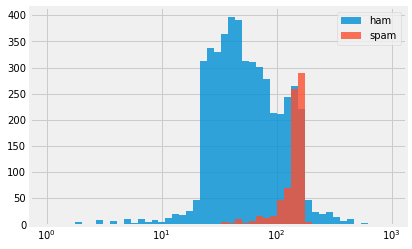

In [8]:
# Here we will plot the length column using a histogram
# Since the data is skewed we will plot using a log transformation
# As measured by length, there seems to be some level of length where it's easy to decipher between spam and ham

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(emails[emails['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(emails[emails['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

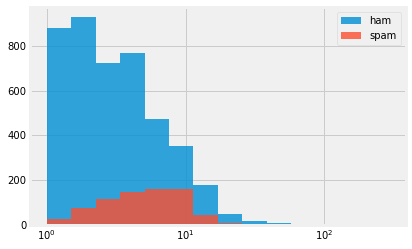

In [10]:
# Here we will plot the punct column using a histogram
# Since the data is skewed we will plot using a log transformation
# As measured by punct, there does not seem to be a level of punct to decipher between spam and ham

plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(emails[emails['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(emails[emails['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

# Creating Our Classification Model Part One

In [12]:
# We will set up our X and y variables
# X is our "feature" data
# Note the double set of brackets because you are passing in a LIST of columns
X = emails[['length','punct']]  

# y is our "label" data
y = emails['label']

In [13]:
# Here we will split our data into a training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Training Data Shape:', X_train.shape)
print('Testing Data Shape: ', X_test.shape)

Training Data Shape: (4457, 2)
Testing Data Shape:  (1115, 2)


In [14]:
# Now we are setting up our actual classification model
# We will use simple Logistic Regression

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='lbfgs')

lr_model.fit(X_train, y_train)

LogisticRegression()

In [15]:
# Here are our predictions from the model

y_pred = lr_model.predict(X_test)

In [16]:
# Now we will evaluate our model by making a confusion matrix
from sklearn import metrics

# Print a confusion matrix
print(metrics.confusion_matrix(y_test,y_pred))

[[931  35]
 [145   4]]


In [17]:
# You can make the confusion matrix less confusing by adding labels:

cm = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred), index=['ham','spam'], columns=['ham','spam'])

In [18]:
cm

,ham,spam
ham,931,35
spam,145,4


In [19]:
# Here we are printing a classification report that gives us more details about our model
# Looks like good precision and recall scores for "ham", but very poor for "spam"

print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.87      0.96      0.91       966
        spam       0.10      0.03      0.04       149

    accuracy                           0.84      1115
   macro avg       0.48      0.50      0.48      1115
weighted avg       0.76      0.84      0.80      1115



In [20]:
# Here we are printing the overall accuracy
# 84% accuracy, and remember that this is an unbalanced dataset

print(metrics.accuracy_score(y_test,y_pred))

0.8385650224215246


# Creating Our Classification Model Part Two

In [21]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)

MultinomialNB()

In [22]:
# Here are our predictions from the model

y_pred = nb_model.predict(X_test)

In [23]:
# Now we will evaluate our model by making a confusion matrix
from sklearn import metrics

# Print a confusion matrix
print(metrics.confusion_matrix(y_test,y_pred))

[[956  10]
 [149   0]]


In [24]:
# You can make the confusion matrix less confusing by adding labels:

cm = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred), index=['ham','spam'], columns=['ham','spam'])

In [25]:
cm

,ham,spam
ham,956,10
spam,149,0


In [26]:
# Here we are printing a classification report that gives us more details about our model

print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.92       966
        spam       0.00      0.00      0.00       149

    accuracy                           0.86      1115
   macro avg       0.43      0.49      0.46      1115
weighted avg       0.75      0.86      0.80      1115



In [27]:
# Here we are printing the overall accuracy
# 86% accuracy, and remember that this is an unbalanced dataset

print(metrics.accuracy_score(y_test,y_pred))

0.8573991031390135


# Creating Our Classification Model Part Three

In [28]:
from sklearn.svm import SVC

svc_model = SVC(gamma='auto')

svc_model.fit(X_train,y_train)

SVC(gamma='auto')

In [29]:
# Here are our predictions from the model

y_pred = svc_model.predict(X_test)

In [30]:
# Now we will evaluate our model by making a confusion matrix
from sklearn import metrics

# Print a confusion matrix
print(metrics.confusion_matrix(y_test,y_pred))

[[919  47]
 [ 82  67]]


In [31]:
# You can make the confusion matrix less confusing by adding labels:

cm = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred), index=['ham','spam'], columns=['ham','spam'])

In [32]:
cm

,ham,spam
ham,919,47
spam,82,67


In [33]:
# Here we are printing a classification report that gives us more details about our model

print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.95      0.93       966
        spam       0.59      0.45      0.51       149

    accuracy                           0.88      1115
   macro avg       0.75      0.70      0.72      1115
weighted avg       0.87      0.88      0.88      1115



In [34]:
# Here we are printing the overall accuracy
# 88% accuracy, and remember that this is an unbalanced dataset

print(metrics.accuracy_score(y_test,y_pred))

0.884304932735426
